<a href="https://colab.research.google.com/github/kbansal17/land_cover_land_use_lake_using_logistic_regression/blob/main/lr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 36.0 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()
tif_files = list(uploaded.keys())
print("Uploaded files:", tif_files)

Saving Landsat_1990_Madurantakam.tif to Landsat_1990_Madurantakam.tif
Saving Landsat_2000_Madurantakam.tif to Landsat_2000_Madurantakam.tif
Saving Landsat_2010_Madurantakam.tif to Landsat_2010_Madurantakam.tif
Saving Sentinel2_2020_Madurantakam.tif to Sentinel2_2020_Madurantakam.tif
Uploaded files: ['Landsat_1990_Madurantakam.tif', 'Landsat_2000_Madurantakam.tif', 'Landsat_2010_Madurantakam.tif', 'Sentinel2_2020_Madurantakam.tif']



Processing Landsat_1990_Madurantakam.tif...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Classification Report for Logistic Regression:
              precision    recall  f1-score   support

       Water       0.87      0.96      0.91       485
  Vegetation       1.00      1.00      1.00      1722
       Urban       1.00      0.99      0.99      1508
      Barren       0.98      0.93      0.96      1222

    accuracy                           0.98      4937
   macro avg       0.96      0.97      0.96      4937
weighted avg       0.98      0.98      0.98      4937



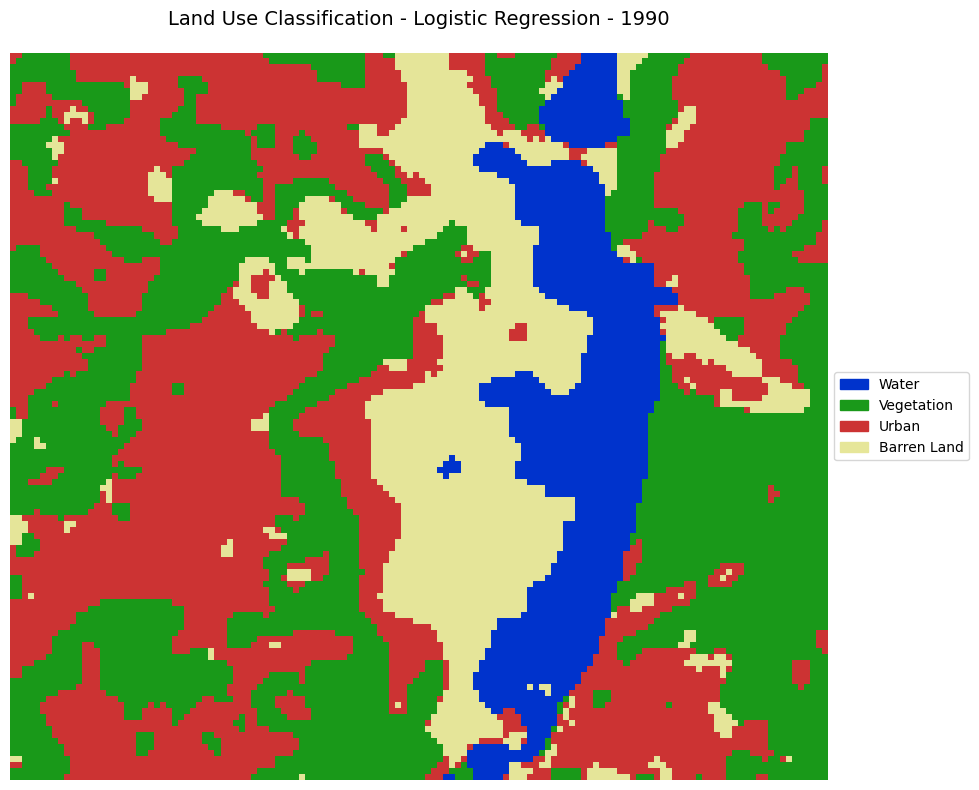


Processing Landsat_2000_Madurantakam.tif...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Classification Report for Logistic Regression:
              precision    recall  f1-score   support

       Water       0.92      0.97      0.95      1720
  Vegetation       1.00      1.00      1.00      1606
       Urban       0.96      1.00      0.98        81
      Barren       0.96      0.91      0.94      1530

    accuracy                           0.96      4937
   macro avg       0.96      0.97      0.97      4937
weighted avg       0.96      0.96      0.96      4937



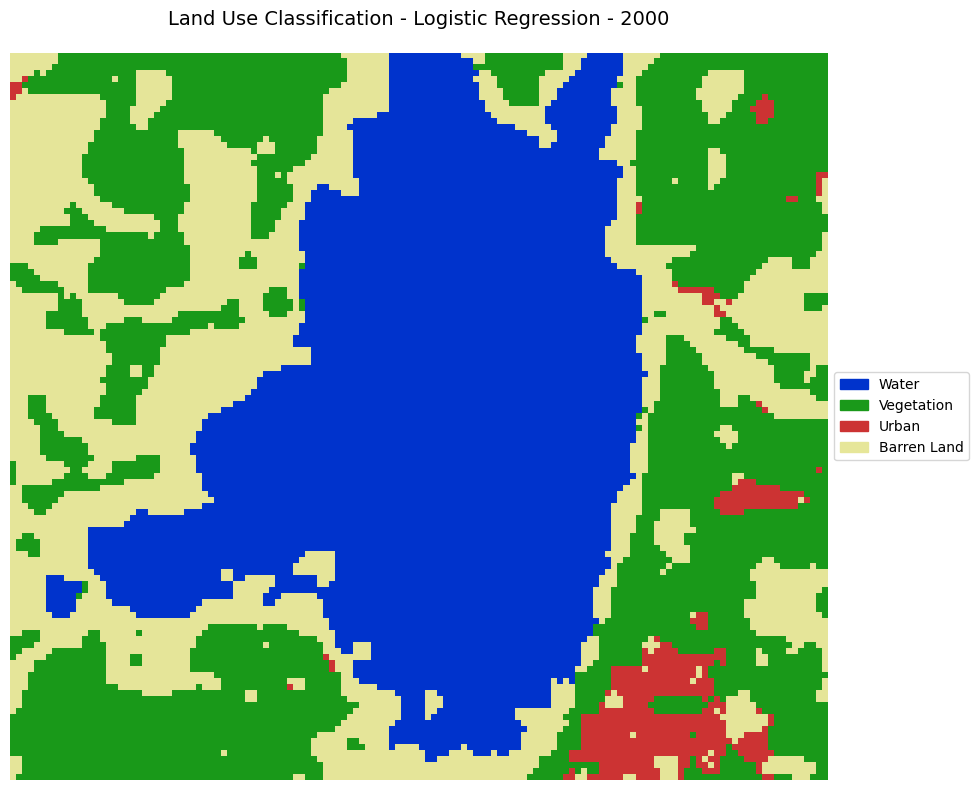


Processing Landsat_2010_Madurantakam.tif...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Classification Report for Logistic Regression:
              precision    recall  f1-score   support

       Water       0.96      0.99      0.97      1063
  Vegetation       0.99      0.99      0.99       835
       Urban       0.98      1.00      0.99      1176
      Barren       0.99      0.97      0.98      1863

    accuracy                           0.98      4937
   macro avg       0.98      0.98      0.98      4937
weighted avg       0.98      0.98      0.98      4937



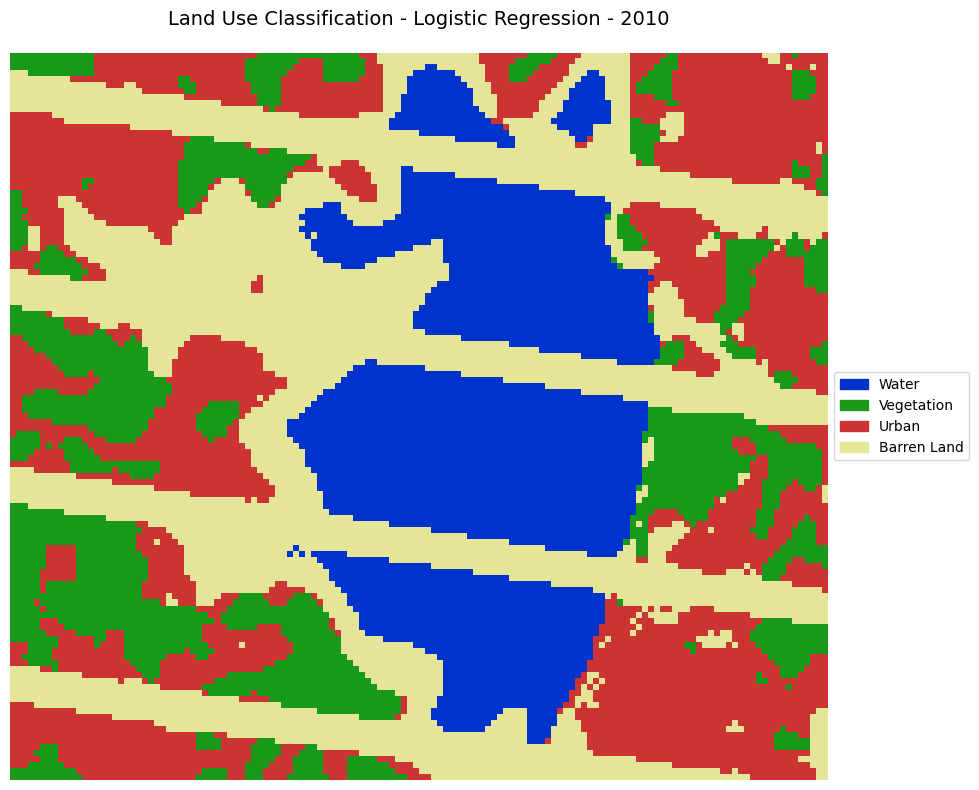


Processing Sentinel2_2020_Madurantakam.tif...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Classification Report for Logistic Regression:
              precision    recall  f1-score   support

       Water       0.99      0.88      0.93      3968
       Urban       0.66      0.96      0.79       930
      Barren       0.20      1.00      0.33         3

    accuracy                           0.90      4901
   macro avg       0.62      0.95      0.68      4901
weighted avg       0.93      0.90      0.91      4901



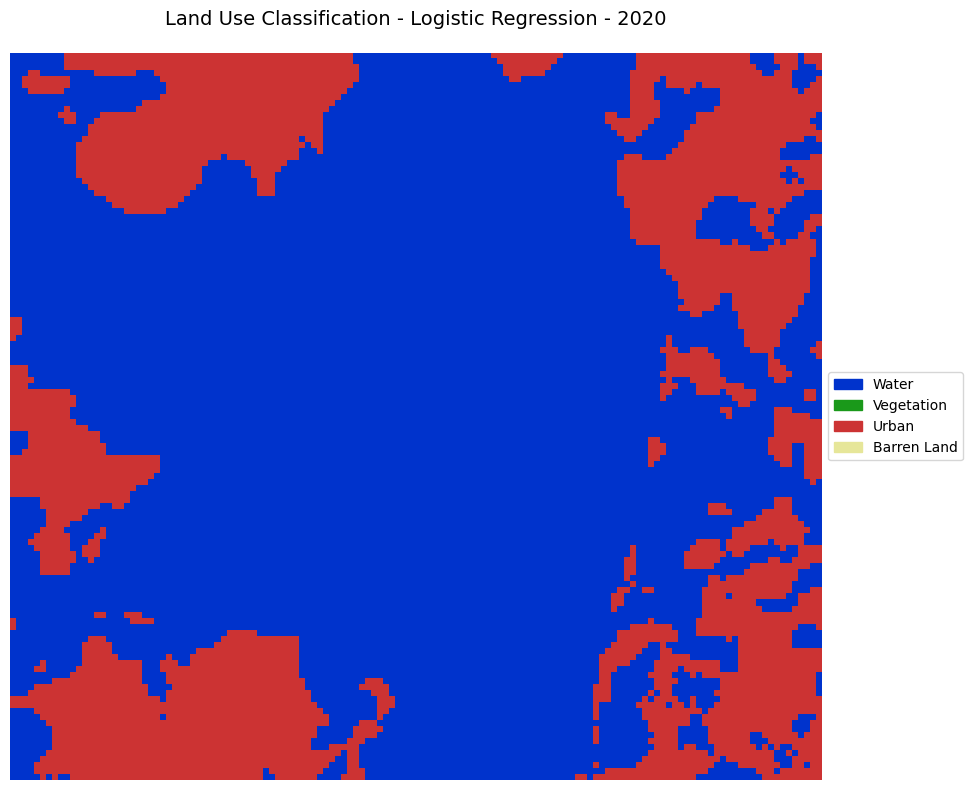

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from skimage.filters import median
from skimage.morphology import disk, binary_closing, binary_opening
import matplotlib.patches as mpatches

def load_image(image_path):
    with rasterio.open(image_path) as dataset:
        bands = dataset.read()
        metadata = dataset.meta
    return bands.astype(np.float32), metadata

def calculate_indices(bands):
    green, red, nir, swir = bands[1], bands[2], bands[3], bands[4]

    with np.errstate(divide='ignore', invalid='ignore'):
        ndvi = (nir - red) / (nir + red)
        ndwi = (green - nir) / (green + nir)
        mndwi = (green - swir) / (green + swir)
        ndbi = (swir - nir) / (swir + nir)

    ndvi = np.nan_to_num(ndvi, nan=0.0, posinf=1.0, neginf=-1.0)
    ndwi = np.nan_to_num(ndwi, nan=0.0, posinf=1.0, neginf=-1.0)
    mndwi = np.nan_to_num(mndwi, nan=0.0, posinf=1.0, neginf=-1.0)
    ndbi = np.nan_to_num(ndbi, nan=0.0, posinf=1.0, neginf=-1.0)

    return ndvi, ndwi, mndwi, ndbi

def enhance_water_detection(ndwi, mndwi, green, nir, swir):
    water_mask = np.zeros_like(ndwi, dtype=bool)

    water_mask1 = (ndwi > 0.1) & (mndwi > 0.1)
    water_mask2 = (green > nir) & (green > swir)
    water_mask3 = (mndwi > 0.0) & (ndwi > 0.0)

    water_mask = water_mask1 | water_mask2 | water_mask3

    water_mask = binary_closing(water_mask, disk(2))
    water_mask = binary_opening(water_mask, disk(1))

    return water_mask

def assign_labels(bands, ndvi, ndwi, mndwi, ndbi):
    labels = np.full(ndvi.shape, -1, dtype=np.int32)

    water_mask = enhance_water_detection(ndwi, mndwi, bands[1], bands[3], bands[4])
    labels[water_mask] = 0

    non_water = ~water_mask

    veg_mask = (ndvi > 0.2) & non_water
    labels[veg_mask] = 1

    urban_mask = (ndbi > 0.0) & (ndvi < 0.2) & non_water & ~veg_mask
    labels[urban_mask] = 2

    labels[labels == -1] = 3

    return labels

def prepare_features(file_path):
    print(f"\nProcessing {file_path}...")
    bands, metadata = load_image(file_path)
    ndvi, ndwi, mndwi, ndbi = calculate_indices(bands)

    features = np.stack([
        bands[1].ravel(),
        bands[2].ravel(),
        bands[3].ravel(),
        bands[4].ravel(),
        ndvi.ravel(),
        ndwi.ravel(),
        mndwi.ravel(),
        ndbi.ravel()
    ], axis=1)

    labels = assign_labels(bands, ndvi, ndwi, mndwi, ndbi)

    return features, labels.ravel(), bands[0].shape

def train_and_classify_lr(features, labels, shape):
    valid_mask = ~np.isnan(features).any(axis=1)
    X = features[valid_mask]
    y = labels[valid_mask]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    classifier = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('logreg', LogisticRegression(max_iter=200, class_weight='balanced', random_state=42))
    ])

    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    unique_labels_in_data = np.unique(np.concatenate([y_test, y_pred]))
    target_names = ['Water', 'Vegetation', 'Urban', 'Barren']
    filtered_target_names = [target_names[i] for i in unique_labels_in_data]

    print("\nClassification Report for Logistic Regression:")
    print(classification_report(y_test, y_pred, target_names=filtered_target_names))

    predicted_labels = classifier.predict(features)
    return predicted_labels.reshape(shape)

def plot_classification(classified_image, title):
    smoothed = median(classified_image, disk(2))

    colors = {
        0: [0, 0.2, 0.8],
        1: [0.1, 0.6, 0.1],
        2: [0.8, 0.2, 0.2],
        3: [0.9, 0.9, 0.6]
    }

    rgb_image = np.zeros((*smoothed.shape, 3))
    for label, color in colors.items():
        rgb_image[smoothed == label] = color

    plt.figure(figsize=(12, 8))
    plt.imshow(rgb_image)
    plt.title(f'Land Use Classification - {title}', fontsize=14, pad=20)

    legend_patches = [
        mpatches.Patch(color=colors[0], label='Water'),
        mpatches.Patch(color=colors[1], label='Vegetation'),
        mpatches.Patch(color=colors[2], label='Urban'),
        mpatches.Patch(color=colors[3], label='Barren Land')
    ]
    plt.legend(handles=legend_patches, loc='center left', bbox_to_anchor=(1, 0.5))

    plt.axis('off')
    plt.tight_layout()
    plt.show()

def process_image_lr(file_path):
    features, labels, shape = prepare_features(file_path)
    classified = train_and_classify_lr(features, labels, shape)
    year = file_path.split('_')[1]
    plot_classification(classified, f"Logistic Regression - {year}")

files = [
    'Landsat_1990_Madurantakam.tif',
    'Landsat_2000_Madurantakam.tif',
    'Landsat_2010_Madurantakam.tif',
    'Sentinel2_2020_Madurantakam.tif'
]

for file_path in files:
    process_image_lr(file_path)
